https://www.kaggle.com/datasets/START-UMD/gtd

https://mv1249.github.io/Task4.html

https://github.com/aanshu11/TSF-Task4-EDA-Terrorism/blob/main/GRIPOCT22.ipynb

https://github.com/parth2104/Exploratory-Data-Analysis-on-Global-Terrorism-Dataset/blob/main/The%20Sparks%20Foundation%20Task-%204%20%20%20_EDA-%20Global%20Terrorism.ipynb

https://github.com/sonysinha2022/DataScienceInternships-SPARKS_Foundation/blob/main/GRIP_task4.ipynb

https://github.com/aanshu11/TSF-Task4-EDA-Terrorism/blob/main/GRIPOCT22.ipynb


https://www.kaggle.com/code/ash316/terrorism-around-the-world

https://www.kaggle.com/code/gpreda/global-terrorist-attacks

In [1]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
terror_df = pd.read_csv('globalterrorismdb_0718dist.csv.zip',compression='zip', header=0, sep=',', quotechar='"',encoding='latin1')
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror_df=terror_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

terror_df['casualities']=terror_df['Killed']+terror_df['Wounded']
terror_df.head()

/tmp/ipykernel_7808/1636818647.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror_df = pd.read_csv('globalterrorismdb_0718dist.csv.zip',compression='zip', header=0, sep=',', quotechar='"',encoding='latin1')


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [3]:
terror_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [9]:
print('Country with Highest Terrorist Attacks:',terror_df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror_df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror_df['Killed'].max(),'that took place in',terror_df.loc[terror_df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


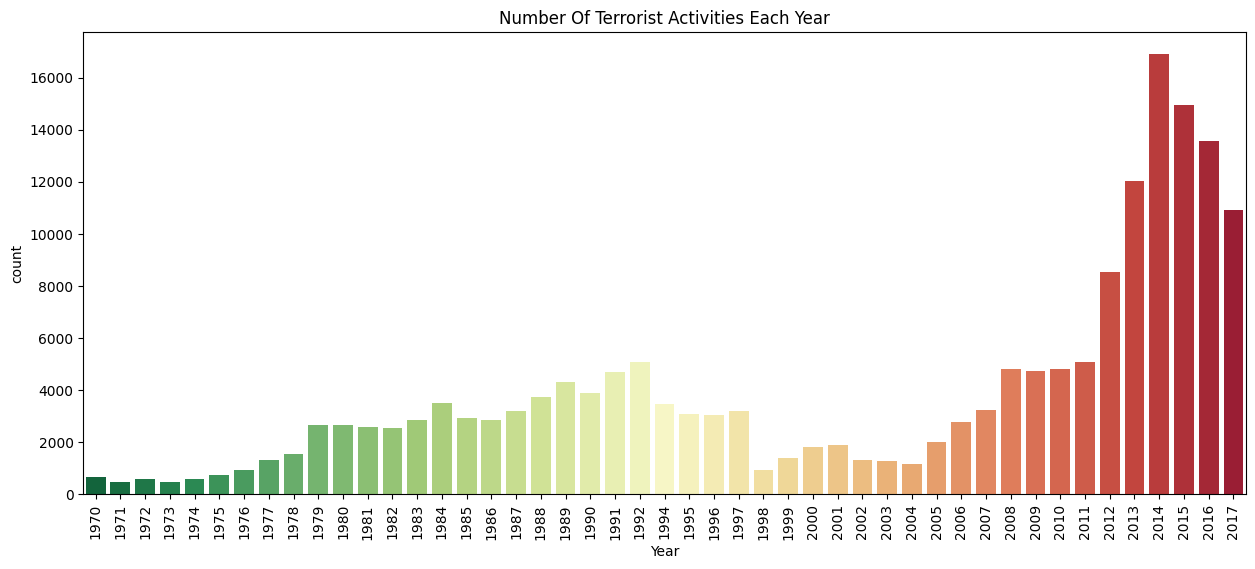

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=terror_df, palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

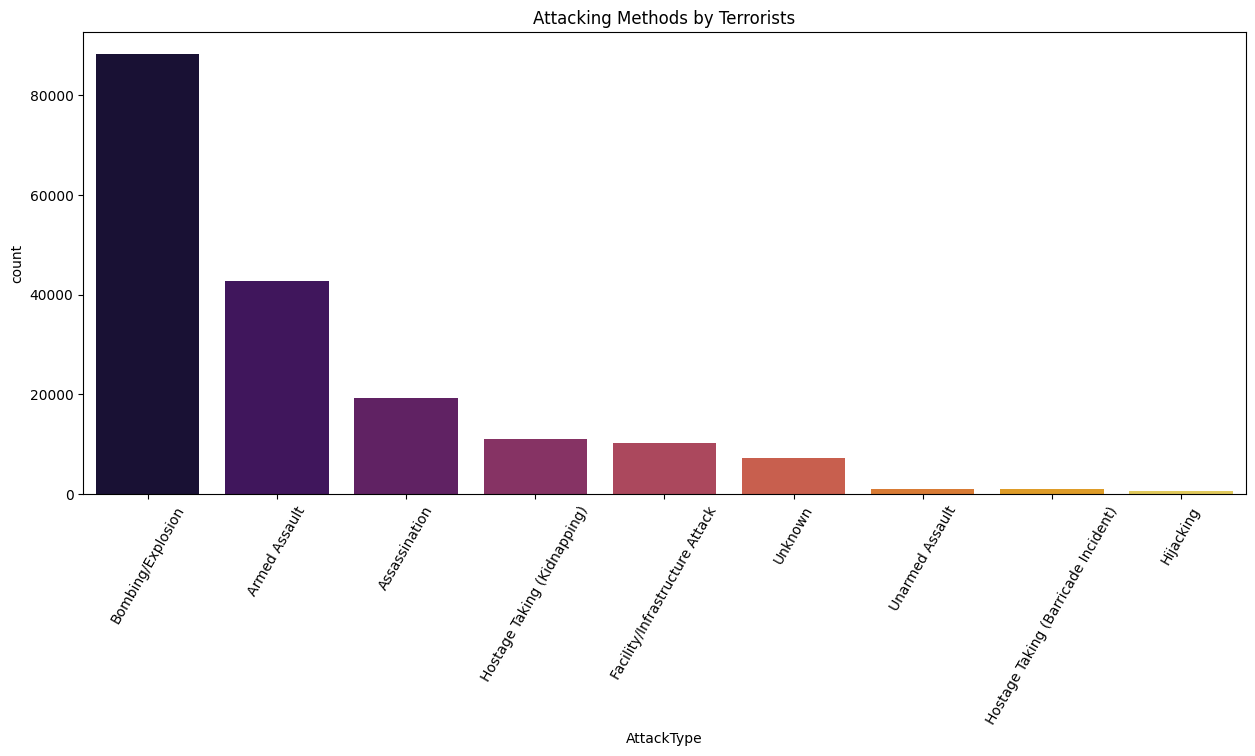

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType',data=terror_df,palette='inferno',order=terror_df['AttackType'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Attacking Methods by Terrorists')
plt.show()

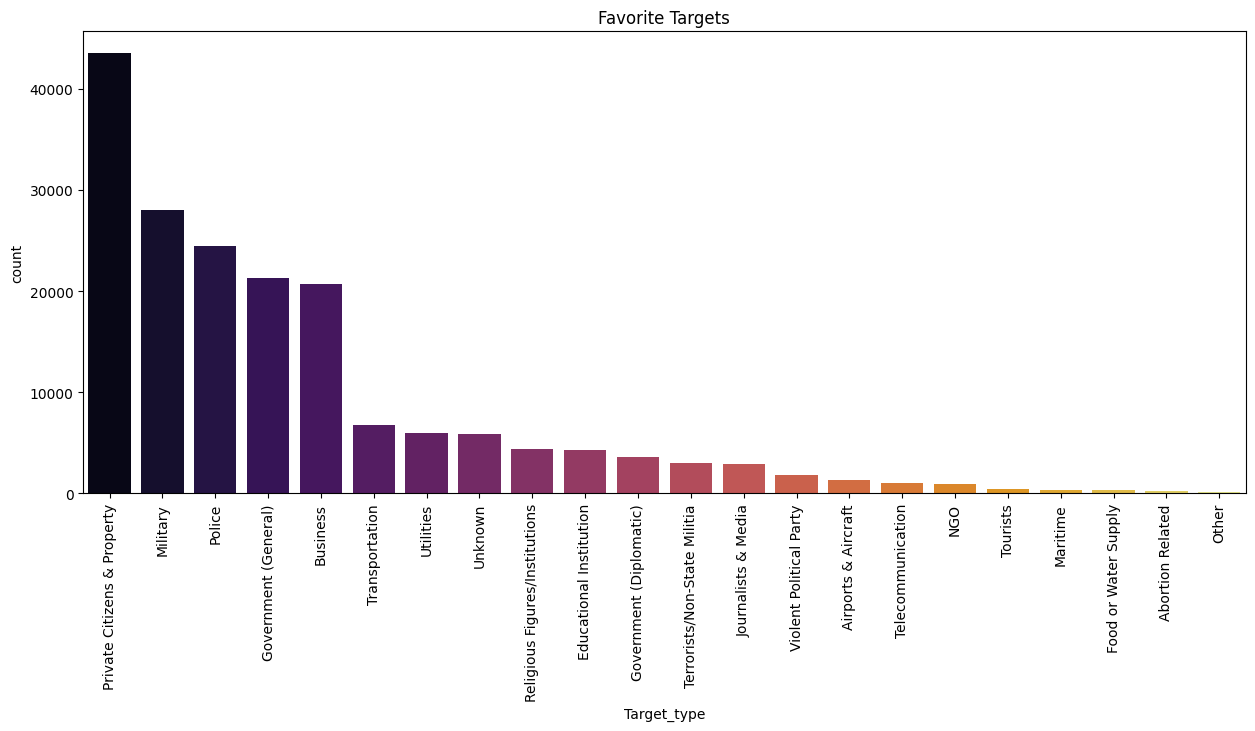

In [35]:
plt.subplots(figsize=(15,6))
sns.countplot(x=terror_df['Target_type'],palette='inferno',order=terror_df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

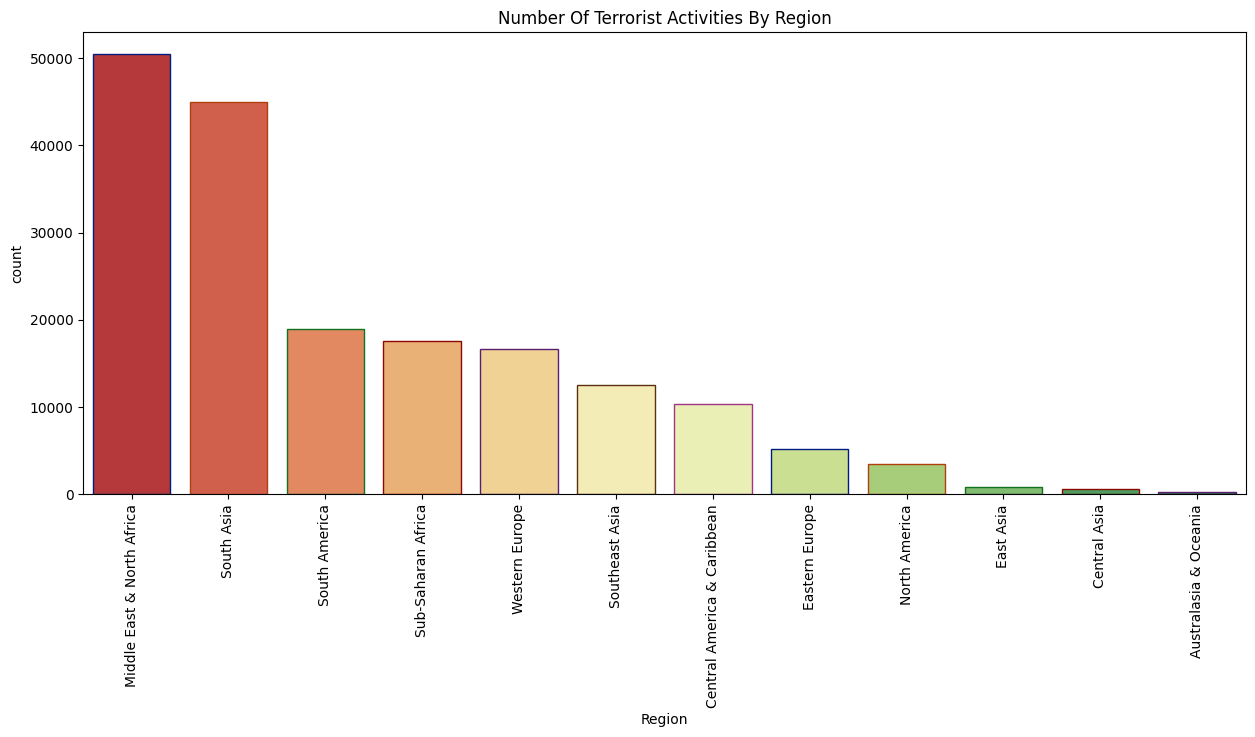

In [40]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Region',data=terror_df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror_df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

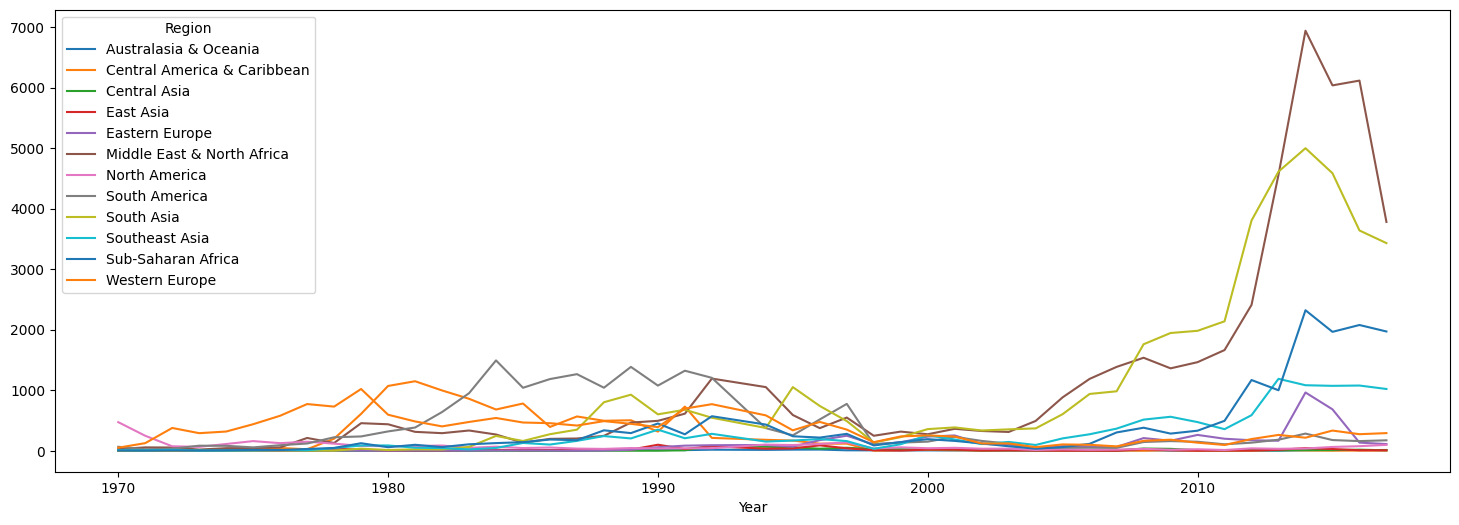

In [46]:
terror_region=pd.crosstab(terror_df.Year,terror_df.Region)
terror_region.plot()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

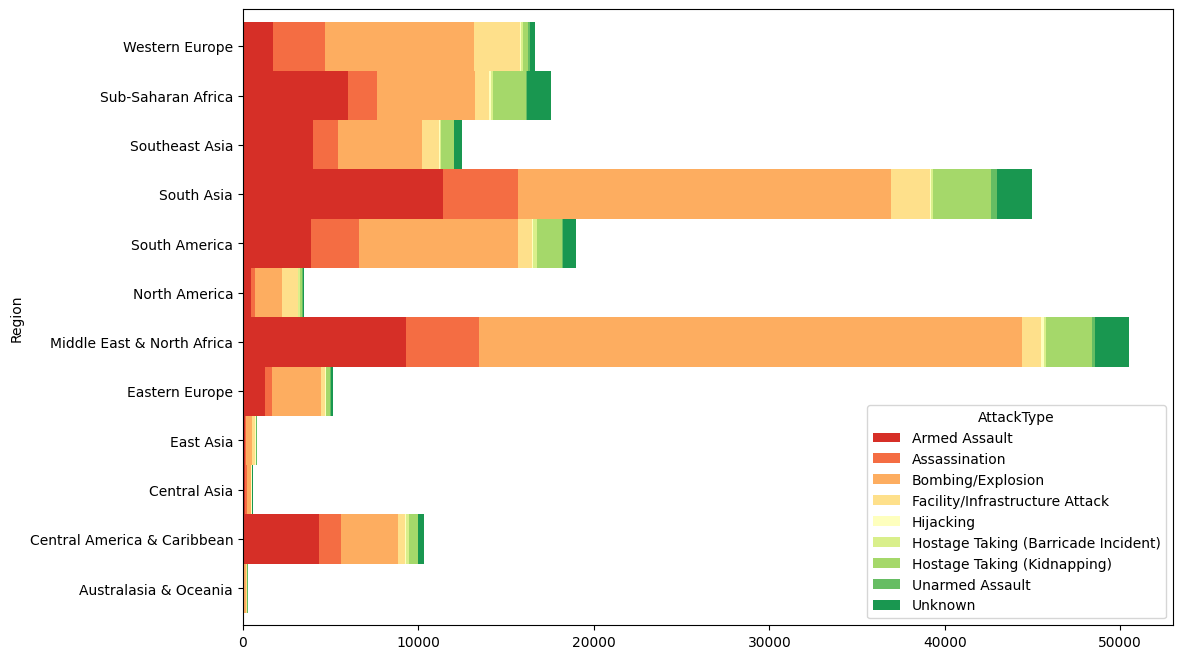

In [59]:
pd.crosstab(terror_df.Region,terror_df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

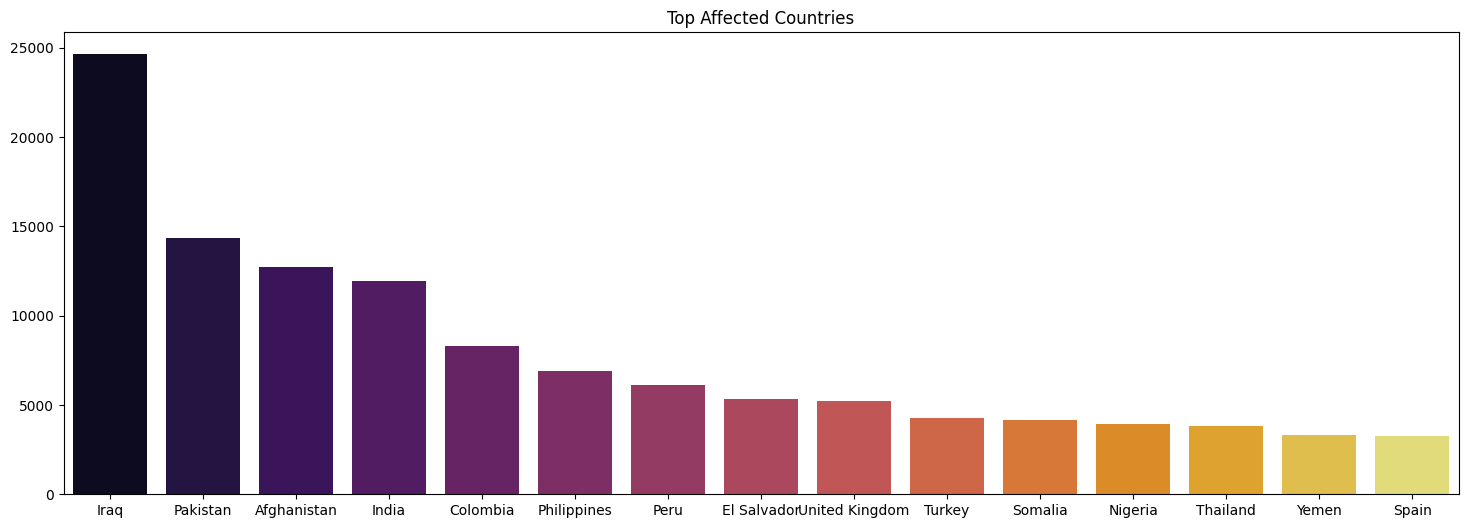

In [62]:
plt.subplots(figsize=(18,6))
sns.barplot(x=terror_df['Country'].value_counts()[:15].index,y=terror_df['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

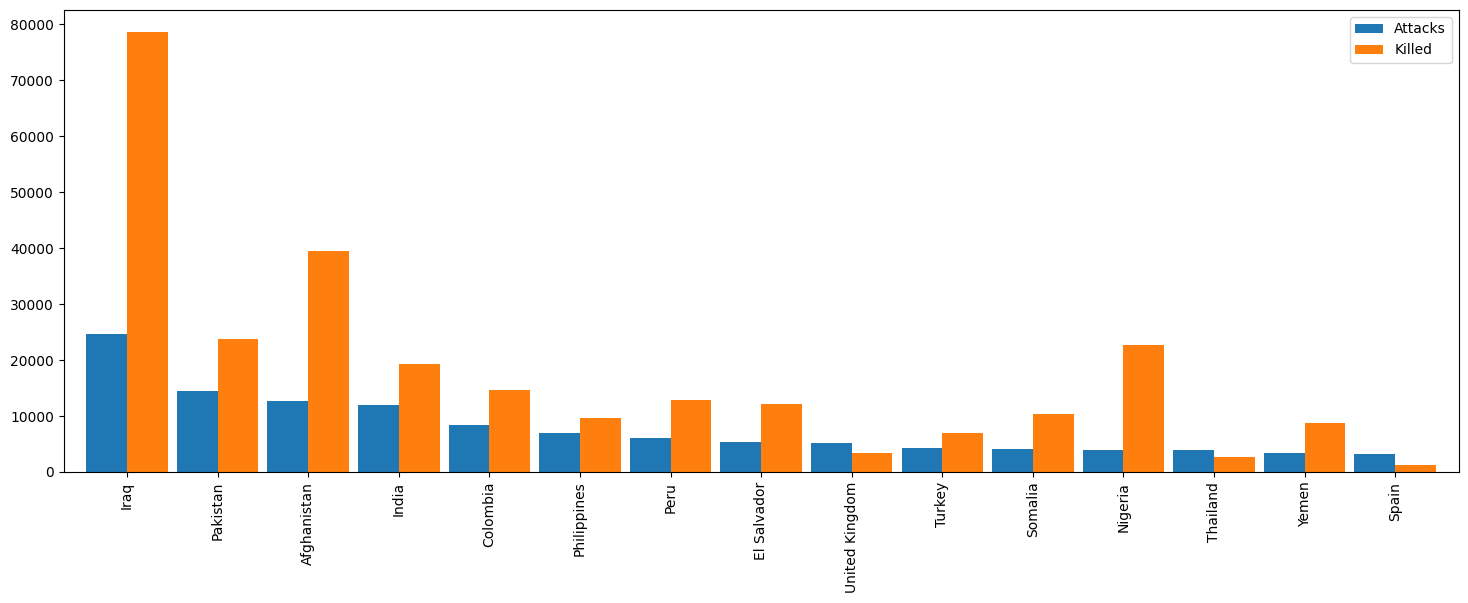

In [63]:
coun_terror=terror_df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror_df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

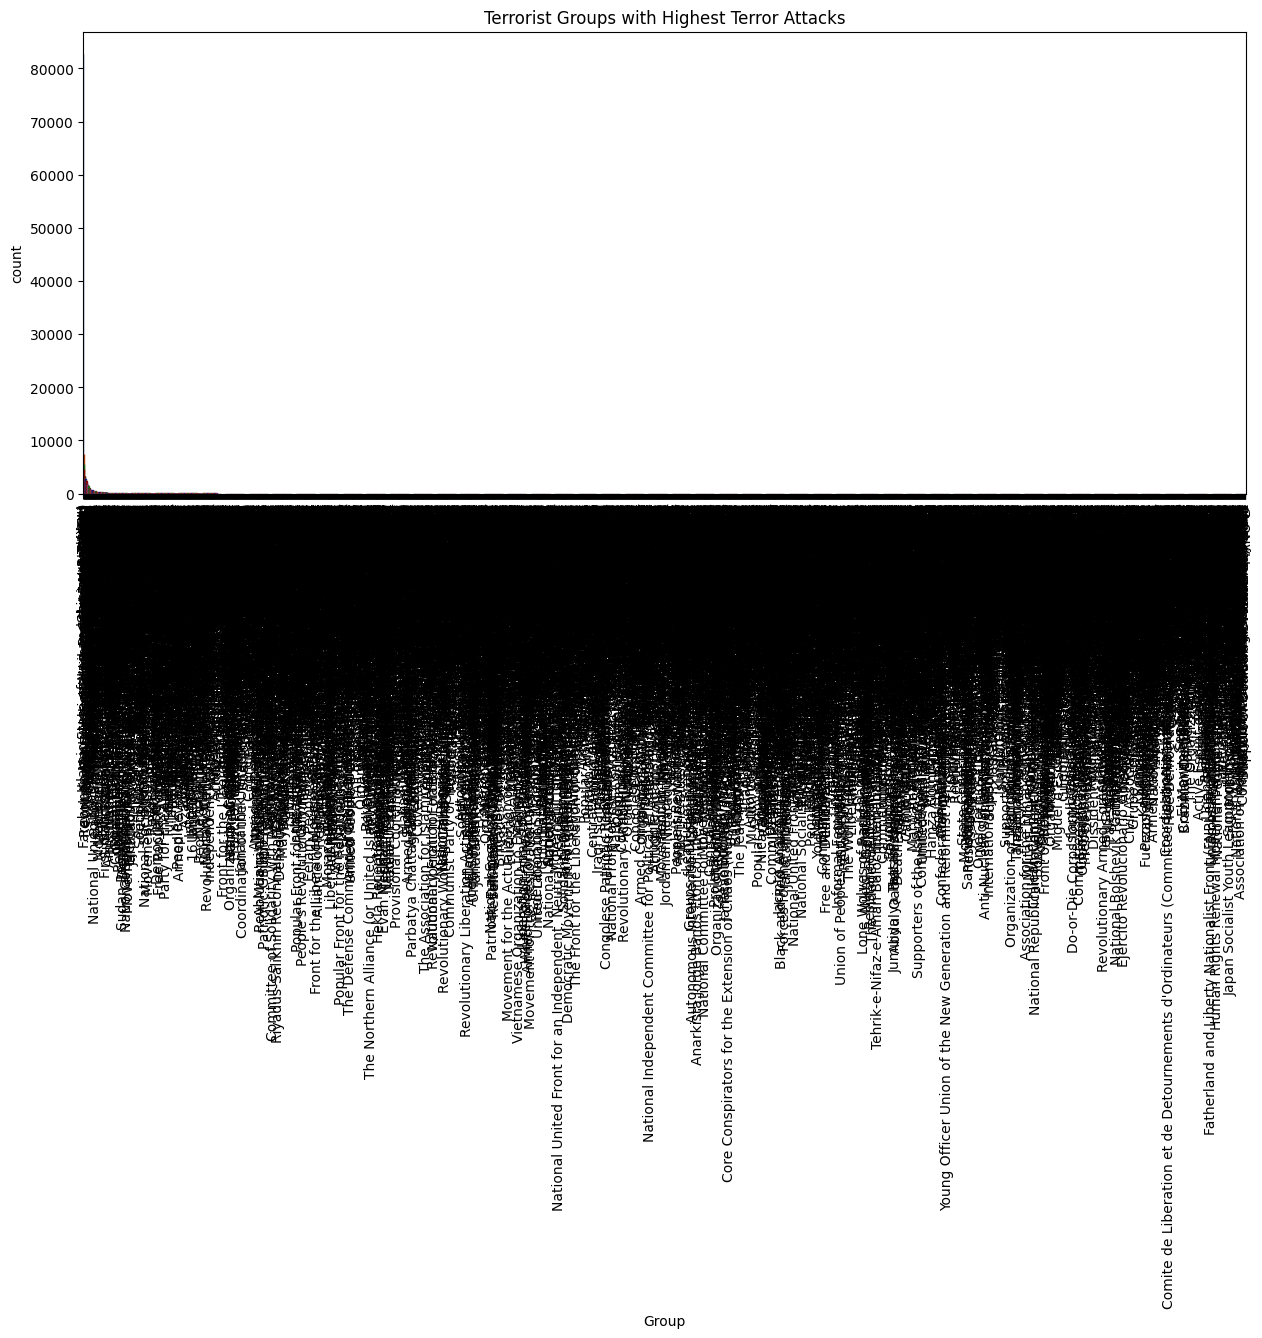

In [64]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Group',data=terror_df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror_df['Group'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

In [68]:
terror_df.to_csv('global_terrorism.csv')

/home/codespace/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
